# Hand in: all details of your computations (the design of your neural network, the information table of the neural network. Find the best learning rate by the . )


# Problem1

## Train a deep MLP on the MNIST dataset
(you can load it using `keras.datasets.mnist.load_data()`. See if you can get over 98% precision.

Try searching for the optimal learning rate by using the approach presented in this chapter (i.e., by growing the learning rate exponentially, plotting the loss, and finding the point where the loss shoots up).

Try adding all the bells and whistles—save checkpoints, use early stopping, and plot learning curves using TensorBoard.

Let's load the dataset:

In [1]:
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import numpy as np

In [2]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


Just like for the Fashion MNIST dataset, the MNIST training set contains 60,000 grayscale images, each 28x28 pixels

The validation set contains 5,000 images, and the test set contains 10,000 images

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255, just like we did for Fashion MNIST:

In [5]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

1. Let's plot an image using Matplotlib's `imshow()` function, with a `'binary'` color map:

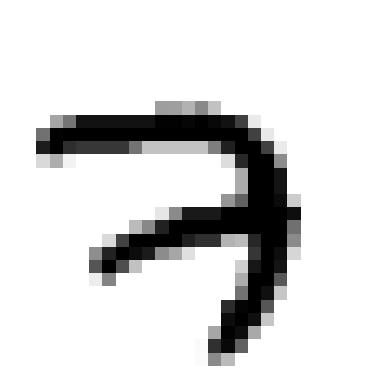

In [20]:
plt.imshow(X_train[0], cmap='binary')
plt.axis('off')
plt.show()

2. The labels are the class IDs (represented as uint8), from 0 to 9. Conveniently, the class IDs correspond to the digits represented in the images, so we don't need a `class_names` array:

In [21]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

3. look at a sample of the images in the dataset:

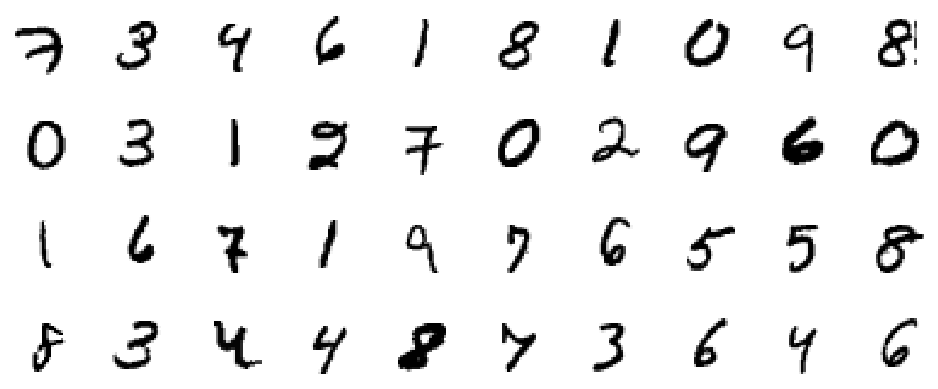

In [22]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')

plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

4. Build a simple dense network and find the optimal learning rate. We will need a callback to grow the learning rate at each iteration. It will also record the learning rate and the loss at each iteration:

In [25]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

We will start with a small learning rate of 1e-3, and grow it by 0.5% at each iteration:
Now let's train the model for just 1 epoch:
We can now plot the loss as a function of the learning rate:
Find a good learning rate.

In [24]:
# Determine Keras running environment and ensure the reproducibility of the model
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [26]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [27]:
model.layers # TBD

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


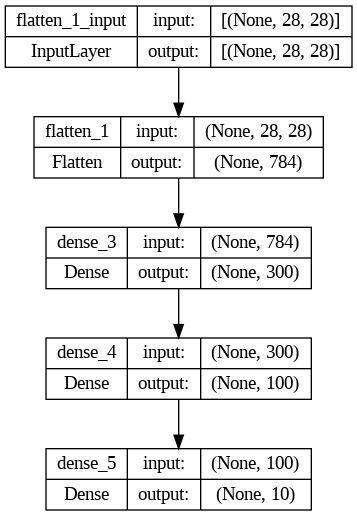

In [29]:
keras.utils.plot_model(model, "my_mnist_model.png", show_shapes=True)

In [47]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

In [48]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [50]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [51]:
# Start with a small learning rate of 1e-3, and grow it by 0.5% at each iteration:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

In [52]:
# let's train the model for just 1 epoch:
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

1719/1719 [==============================] - 9s 5ms/step - loss: nan - accuracy: 0.5884 - val_loss: nan - val_accuracy: 0.0958


Text(0, 0.5, 'Loss')

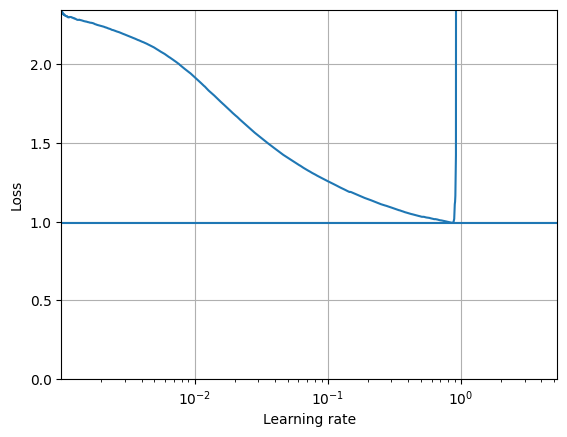

In [53]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

The loss starts shooting back up violently when the learning rate goes over 2e-1, so* let's try using half of that, at 1e-1.*

In [54]:
min(expon_lr.losses)

0.991604745388031

In [55]:
expon_lr.rates[np.argmin(expon_lr.losses)]

0.9851316

Let us set learning rate as 0.3

In [56]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [57]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
#The model needs to be recalled each time.

In [59]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=3e-1),
              metrics=["accuracy"])

In [60]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2368 - accuracy: 0.9262 - val_loss: 0.1132 - val_accuracy: 0.9672
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0934 - accuracy: 0.9710 - val_loss: 0.1041 - val_accuracy: 0.9706
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0668 - accuracy: 0.9790 - val_loss: 0.0722 - val_accuracy: 0.9810
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0480 - accuracy: 0.9845 - val_loss: 0.0831 - val_accuracy: 0.9790
Epoch 5/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.0365 - accuracy: 0.9879 - val_loss: 0.0996 - val_accuracy: 0.9744
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0291 - accuracy: 0.9901 - val_loss: 0.0793 - val_accuracy: 0.9782
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0205 - accuracy: 0.9931 - val_loss: 0.0897 - val_accuracy

In [61]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0919 - accuracy: 0.9860


[0.0918695405125618, 0.9860000014305115]

### Early Stopping

In [62]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers, callbacks

In [63]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [64]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
#The model needs to be recalled each time.

In [65]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=3e-1),
              metrics=["accuracy"])

In [67]:
import os

run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))
run_logdir

'./my_mnist_logs/run_001'

In [68]:
early_stopping_cb = keras.callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=10, # how many epochs to wait before stopping
)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2344 - accuracy: 0.9268 - val_loss: 0.1048 - val_accuracy: 0.9668
Epoch 2/100
  26/1719 [..............................] - ETA: 10s - loss: 0.0824 - accuracy: 0.9712

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1719/1719 [==============================] - 9s 5ms/step - loss: 0.0943 - accuracy: 0.9709 - val_loss: 0.1070 - val_accuracy: 0.9690
Epoch 3/100
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0658 - accuracy: 0.9791 - val_loss: 0.0693 - val_accuracy: 0.9774
Epoch 4/100
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0482 - accuracy: 0.9843 - val_loss: 0.0873 - val_accuracy: 0.9756
Epoch 5/100
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0364 - accuracy: 0.9886 - val_loss: 0.0826 - val_accuracy: 0.9764
Epoch 6/100
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0285 - accuracy: 0.9903 - val_loss: 0.0835 - val_accuracy: 0.9774
Epoch 7/100
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0217 - accuracy: 0.9930 - val_loss: 0.0760 - val_accuracy: 0.9796
Epoch 8/100
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0191 - accuracy: 0.9940 - val_loss: 0.0786 - val_accuracy: 0.9

In [69]:
model = keras.models.load_model("my_mnist_model.h5") # rollback to best model
model.evaluate(X_test, y_test)
model.evaluate(X_valid, y_valid)
model.evaluate(X_train, y_train)

1719/1719 [==============================] - 6s 3ms/step - loss: 0.0393 - accuracy: 0.9873


[0.039323627948760986, 0.9872727394104004]

# Problem 2:

###   Train a deep neural network on the MRI slices dataset.  

#### (1) Mount Google drive and import libraries

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [60]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


#### (2) Loading dataset

In [61]:
# MRI folder path
data_path = '/content/drive/MyDrive/Colab Notebooks/MATH7243_MachineLearning/Lab3/MRI_Images/'

# Load target y
labels = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MATH7243_MachineLearning/Lab3/labels.csv")
y = labels["CDR"].values

# Load MRI images from the folder
X = []
for image_file in os.listdir(data_path):
    if image_file.endswith('.png'):
        image = plt.imread(os.path.join(data_path, image_file))
        X.append(image)

X = np.array(X)


Check MRI slice

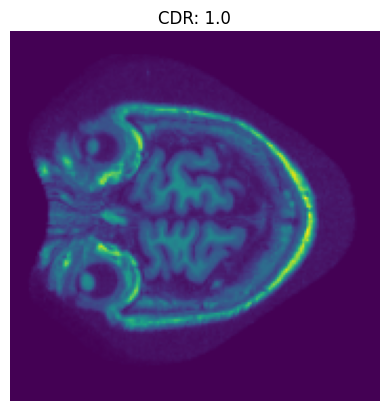

In [62]:
# Choose image's index
image_index = 49 # change any index that you're interested

# Display MRI images
plt.imshow(X[image_index])

# Set title as corresponding target y
title = f"CDR: {y[image_index]}"

plt.title(title)
plt.axis('off')
plt.show()




#### (3) Data preprocessing

In [63]:
import cv2

new_width = 28
new_height = 28

# Adjust the image size (if needed)
X = np.array([cv2.resize(img, (new_width, new_height)) for img in X])

# # Standardize the image
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

# Split train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### (4) Build deep neural network

Fully connected neural network

In [64]:
keras.backend.clear_session()
np.random.seed(76)
tf.random.set_seed(76)

In [65]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28, 4)),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(4, activation="softmax")  # set up how many numbers of the final classification
])

# For one-hot encoding y labels, using loss = 'categorical_crossentropy'; (need to difference from "sparse_categorical_crossentropy")
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Obtain one-hot encoding y labels: y_train_onehot,  y_test_onehot
# Use keras.utils `to_categorical` convert labels to one-hot encoding

from keras.utils import to_categorical
y_train_onehot = to_categorical(y_train, num_classes=4)  # change "num_classes" for predicted classes
y_test_onehot = to_categorical(y_test, num_classes=4)

# Train model
model.fit(X_train, y_train_onehot, epochs=10, batch_size=32, validation_data=(X_test, y_test_onehot))


Epoch 1/10
16/16 [==============================] - 1s 32ms/step - loss: 1.2328 - accuracy: 0.7618 - val_loss: 0.3970 - val_accuracy: 0.8852
Epoch 2/10
16/16 [==============================] - 0s 16ms/step - loss: 0.5385 - accuracy: 0.8131 - val_loss: 0.4802 - val_accuracy: 0.8852
Epoch 3/10
16/16 [==============================] - 0s 18ms/step - loss: 0.5684 - accuracy: 0.8624 - val_loss: 0.4988 - val_accuracy: 0.8852
Epoch 4/10
16/16 [==============================] - 0s 20ms/step - loss: 0.5518 - accuracy: 0.8624 - val_loss: 0.3884 - val_accuracy: 0.8852
Epoch 5/10
16/16 [==============================] - 0s 18ms/step - loss: 0.5112 - accuracy: 0.8357 - val_loss: 0.3760 - val_accuracy: 0.8852
Epoch 6/10
16/16 [==============================] - 0s 17ms/step - loss: 0.4417 - accuracy: 0.8624 - val_loss: 0.3726 - val_accuracy: 0.8852
Epoch 7/10
16/16 [==============================] - 0s 19ms/step - loss: 0.4543 - accuracy: 0.8624 - val_loss: 0.3758 - val_accuracy: 0.8852
Epoch 8/10
16

### (5) DATA Augmentation

In [66]:
keras.backend.clear_session()
np.random.seed(76)
tf.random.set_seed(76)

In [67]:
from keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,  # Randomly rotate between [-20, 20]
    width_shift_range=0.2,  # Randomly shift horizontally
    height_shift_range=0.2,  # Randomly shift vertically
    shear_range=0.2,  # Shear range
    zoom_range=0.2,  # Randomly zoom
    horizontal_flip=True,  # Randomly horizontal flip
    vertical_flip=True,  # Randomly vertical flip
    brightness_range=[0.8, 1.2]  # Randomly brightness
)

# Fit datagen to X_train
datagen.fit(X_train)



In [68]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28, 4)),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(4, activation="softmax")  # set up how many numbers of the final classification
])
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 300)               941100    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 4)                 404       
                                                                 
Total params: 971604 (3.71 MB)
Trainable params: 971604 (3.71 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy', patience = 2, verbose =1, factor =0.3, mi_lr =0.000001)

In [70]:
history = model.fit(datagen.flow(X_train, y_train, batch_size =32), epochs =12, validation_data = datagen.flow(X_test, y_test))

Epoch 1/12
16/16 [==============================] - 2s 74ms/step - loss: 0.5655 - accuracy: 0.5195 - val_loss: 0.3743 - val_accuracy: 0.6230
Epoch 2/12
16/16 [==============================] - 1s 50ms/step - loss: 0.4577 - accuracy: 0.5585 - val_loss: 0.3846 - val_accuracy: 0.6230
Epoch 3/12
16/16 [==============================] - 1s 49ms/step - loss: 0.4597 - accuracy: 0.5585 - val_loss: 0.3812 - val_accuracy: 0.6230
Epoch 4/12
16/16 [==============================] - 1s 74ms/step - loss: 0.4548 - accuracy: 0.5585 - val_loss: 0.3936 - val_accuracy: 0.6230
Epoch 5/12
16/16 [==============================] - 1s 79ms/step - loss: 0.4499 - accuracy: 0.5585 - val_loss: 0.3711 - val_accuracy: 0.6230
Epoch 6/12
16/16 [==============================] - 1s 79ms/step - loss: 0.4625 - accuracy: 0.5585 - val_loss: 0.3724 - val_accuracy: 0.6230
Epoch 7/12
16/16 [==============================] - 1s 82ms/step - loss: 0.4494 - accuracy: 0.5585 - val_loss: 0.3714 - val_accuracy: 0.6230
Epoch 8/12
16

In [71]:
print('Loss of the model is:', model.evaluate(X_test, y_test)[0])
print('Accuracy of the model is:', model.evaluate(X_test, y_test)[1]*100, '%')

4/4 [==============================] - 0s 9ms/step - loss: 0.3847 - accuracy: 0.6230
Loss of the model is: 0.3846627175807953
4/4 [==============================] - 0s 9ms/step - loss: 0.3847 - accuracy: 0.6230
Accuracy of the model is: 62.29507923126221 %


### (6) Gray image preprocessing

In [72]:
from PIL import Image

# Iterate each image in X
gray_images = []
for image in X:
    # Convert float to integers
    image = (image * 255).astype(np.uint8)

    # Remove channel alpha
    image = image[:, :, :3]

    # Convert to PIL Image
    pil_image = Image.fromarray(image)

    # Convert images to "Gray" images
    gray_image = pil_image.convert("L")

    # Convert PIL image to Numpy array
    gray_image_array = np.array(gray_image)

    # Append np.array to gray_images
    gray_images.append(gray_image_array)

# Convert images to Numpy array
gray_images = np.array(gray_images)


In [73]:
gray_images.shape

(609, 28, 28)

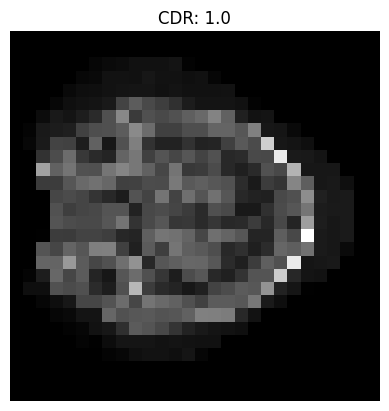

In [75]:
# Choose image's index
image_index = 49 # change any index that you're interested

# Display MRI images
plt.imshow(gray_images[image_index], cmap='gray')

# Set title as corresponding target y
title = f"CDR: {y[image_index]}"

plt.title(title)
plt.axis('off')
plt.show()

In [76]:
import cv2

new_width = 28
new_height = 28

# Adjust the image size (if needed)
gray_images = np.array([cv2.resize(img, (new_width, new_height)) for img in gray_images])

# # Standardize the image
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

# Split train and test set
X_train, X_test, y_train, y_test = train_test_split(gray_images, y, test_size=0.2, random_state=42)

In [77]:
keras.backend.clear_session()
np.random.seed(76)
tf.random.set_seed(76)

In [78]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(4, activation="softmax")  # set up how many numbers of the final classification
])

# For one-hot encoding y labels, using loss = 'categorical_crossentropy'; (need to difference from "sparse_categorical_crossentropy")
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Obtain one-hot encoding y labels: y_train_onehot,  y_test_onehot
# Use keras.utils `to_categorical` convert labels to one-hot encoding

from keras.utils import to_categorical
y_train_onehot = to_categorical(y_train, num_classes=4)  # change "num_classes" for predicted classes
y_test_onehot = to_categorical(y_test, num_classes=4)

# Train model
model.fit(X_train, y_train_onehot, epochs=30, batch_size=32, validation_data=(X_test, y_test_onehot))

Epoch 1/30
16/16 [==============================] - 1s 28ms/step - loss: 8461331.0000 - accuracy: 0.6817 - val_loss: 7.1489 - val_accuracy: 0.1557
Epoch 2/30
16/16 [==============================] - 0s 10ms/step - loss: 9042045.0000 - accuracy: 0.6099 - val_loss: 1.8857 - val_accuracy: 0.8525
Epoch 3/30
16/16 [==============================] - 0s 9ms/step - loss: 1.4202 - accuracy: 0.8604 - val_loss: 1.2677 - val_accuracy: 0.8770
Epoch 4/30
16/16 [==============================] - 0s 14ms/step - loss: 7512.4258 - accuracy: 0.8049 - val_loss: 1.1950 - val_accuracy: 0.8770
Epoch 5/30
16/16 [==============================] - 0s 10ms/step - loss: 233897.4688 - accuracy: 0.8604 - val_loss: 1.1398 - val_accuracy: 0.8770
Epoch 6/30
16/16 [==============================] - 0s 10ms/step - loss: 374194.5625 - accuracy: 0.8029 - val_loss: 1.0716 - val_accuracy: 0.8770
Epoch 7/30
16/16 [==============================] - 0s 11ms/step - loss: 1.0438 - accuracy: 0.8624 - val_loss: 1.0181 - val_accura